<a href="https://colab.research.google.com/github/BrendaChepkoech/-Mchezopesa-Ltd-Project/blob/main/Brenda_Chepkoech_Week_6_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supervised Learning with Exploratory Data Analysis - Exercise 1

## 1. Defining the Question

### a) Specifying the Question


You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

You have two possible approaches (as  shown below) given the datasets that will be provided

Input: Home team, Away team, Tournament type (World cup, Friendly, Other)



### b) Defining the Metric for Success

**Approach 1: Polynomial approach**

Be able to Predict how many goals the home team scores.
Be able to Predict how many goals the away team scores.

**Approach 2: Logistic approach**

Feature Engineering: Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

### c) Understanding the context 

You have been recruited as a football analyst in a company - Mchezopesa Ltd and tasked to accomplish the task below.

A prediction result of a game between team 1 and team 2, based on who's home and who's away, and on whether or not the game is friendly (include rank in your training).

### d) Recording the Experimental Design



*   Reading the data
*   Previewing the 2 datasets
*   Perform data cleaning
*   Merging the dataset
*   Performing EDA
*   Before modelling, make sure to perform feature scalling and check for multicollinearity.
*   Perform polynomial and logistic regression
*   Check for residuals and also test for heteroskedasticity
*   Compute the accuracy of the models


### e) Data Relevance

The data provided is relevant since it has all the data that is needed for analysis and building a model for prediction

## 2. Reading the Data

In [1043]:
# Loading libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [1044]:
# Loading the Dataset
# Loading the fifa ranking dataset
#
rankings=pd.read_csv("/content/fifa_ranking.csv")

In [1045]:
# Loading the Dataset
# Loading the results dataset
#
results=pd.read_csv("/content/results.csv")

## 3. Checking the Data

In [1046]:
# Determining the no. of records in our dataset
#rankings
rankings.shape

(57793, 16)

In [1047]:
# Previewing the top of our dataset
rankings.head(2)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08
1,2,Italy,ITA,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [1048]:
# Previewing the bottom of our dataset
# 
rankings.tail(2)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57791,206,Somalia,SOM,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAF,2018-06-07
57792,206,Tonga,TGA,0.0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,OFC,2018-06-07


In [1049]:
# Checking whether each column has an appropriate datatype
#
rankings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

In [1050]:
#results
results.shape

(40839, 9)

In [1051]:
# Previewing the top of our dataset
results.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False


In [1052]:
## Previewing the bottom of our dataset
results.tail(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [1053]:
# Checking whether each column has an appropriate datatype
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


## 4. External Data Source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

### a.Validation

## 5. Tidying the Dataset

In [1054]:
# Identifying the Missing Data
#rankings
rankings.isnull().sum()

rank                       0
country_full               0
country_abrv               0
total_points               0
previous_points            0
rank_change                0
cur_year_avg               0
cur_year_avg_weighted      0
last_year_avg              0
last_year_avg_weighted     0
two_year_ago_avg           0
two_year_ago_weighted      0
three_year_ago_avg         0
three_year_ago_weighted    0
confederation              0
rank_date                  0
dtype: int64

In [1055]:
# Identifying the Missing Data
#Results 
results.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [1056]:
# More data cleaning procedures
#checking for duplicates
rankings.duplicated().sum()

37

In [1057]:
#Dealing with duplicates
#rankings.drop_duplicates()
rankings.drop_duplicates(inplace=True)

In [1058]:
# More data cleaning procedures
#checking for duplicates
results.duplicated().sum()

0

In [1059]:
#renaming column names country on the rankings table
rankings.rename(columns={'country_full': 'country',"rank_date":"date"}, inplace=True)
#converting date column to date tyme datatype
rankings.date = pd.to_datetime(rankings.date)
# Locating the year from the rank date 
rankings.date = pd.to_datetime(rankings.date)
rankings['year'] = rankings.date.dt.year
rankings['month'] =rankings.date.dt.month

In [1060]:
# results dataset
#converting date column to date tyme datatype
results.date = pd.to_datetime(results.date)
# Locating the year from the rank date 
results.date = pd.to_datetime(results.date)
results['year'] = results.date.dt.year
results['month'] =results.date.dt.month
# Dropping the irrelevant columns from  our datasets
results.drop(columns =["city","date"])

,home_team,away_team,home_score,away_score,tournament,country,neutral,year,month
0,Scotland,England,0,0,Friendly,Scotland,False,1872,11
1,England,Scotland,4,2,Friendly,England,False,1873,3
2,Scotland,England,2,1,Friendly,Scotland,False,1874,3
3,England,Scotland,2,2,Friendly,England,False,1875,3
4,Scotland,England,3,0,Friendly,Scotland,False,1876,3
...,...,...,...,...,...,...,...,...,...
40834,American Samoa,Tahiti,8,1,Pacific Games,Samoa,True,2019,7
40835,Fiji,Solomon Islands,4,4,Pacific Games,Samoa,True,2019,7
40836,Senegal,Algeria,0,1,African Cup of Nations,Egypt,True,2019,7
40837,Tajikistan,North Korea,0,1,Intercontinental Cup,India,True,2019,7


In [1061]:
# we notice that the ranking dataset started in 1993 and results started in 1872
# therefore we can drop all the data before 1993 in the results dataset
results = results[results['year'] >= 1993]

In [1062]:
# Dropping the irrelevant columns from  our datasets
# ranking dataset
rankings.drop(columns = ["date","country_abrv",'cur_year_avg', 'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted', 'two_year_ago_avg', 'two_year_ago_weighted',	"three_year_ago_avg","three_year_ago_weighted"],inplace=True)

In [1063]:
results.head(1)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month
17361,1993-01-01,Ghana,Mali,1,1,Friendly,Libreville,Gabon,True,1993,1


In [1064]:
rankings.head(1)

,rank,country,total_points,previous_points,rank_change,confederation,year,month
0,1,Germany,0.0,57,0,UEFA,1993,8


## 6. Merging the datasets

In [1065]:
#merging the rankings and results dataset
# We create a dataframe to get the away team rank
rank_away = pd.merge(rankings, results, left_on= ['year','month','country'], right_on= ['year','month','away_team'], how='inner')

# We then drop the unnecessary columns
rank_away.drop(['country_x','rank_change'], axis=1, inplace=True)


In [1066]:
# Rename the country column and the rank to home team rank
rank_away.rename({'country_y':'country'}, axis=1, inplace=True)
rank_away.rename({'rank':'away_team_rank'}, axis=1, inplace=True)
rank_away.head(1)

,away_team_rank,total_points,previous_points,confederation,year,month,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,3,0.0,50,UEFA,1993,8,1993-08-11,Sweden,Switzerland,1,2,Friendly,Borås,Sweden,False


In [1067]:
#merging the rankings and results dataset
# so as to create home team rank 
rank_home = pd.merge(rankings, results, left_on= ['year','month','country'], right_on= ['year','month','home_team'], how='inner')


In [1068]:
# We then drop the unnecessary columns
rank_home.drop(['country_x','rank_change'], axis=1, inplace=True)

# Rename the country column and the rank to home team rank
rank_home.rename({'country_y':'country'}, axis=1, inplace=True)
rank_home.rename({'rank':'home_team_rank'}, axis=1, inplace=True)
rank_home.head(1)


,home_team_rank,total_points,previous_points,confederation,year,month,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,4,0.0,55,UEFA,1993,8,1993-08-11,Sweden,Switzerland,1,2,Friendly,Borås,Sweden,False


In [1069]:
# Lets merge the two datasets to get a general dataset that has both the home rank and away rank
df = pd.merge(rank_home, rank_away, how = 'inner', left_on = ['year','month','away_team'], right_on = ['year','month','away_team'])
df.head(1)

,home_team_rank,total_points_x,previous_points_x,confederation_x,year,month,date_x,home_team_x,away_team,home_score_x,away_score_x,tournament_x,city_x,country_x,neutral_x,away_team_rank,total_points_y,previous_points_y,confederation_y,date_y,home_team_y,home_score_y,away_score_y,tournament_y,city_y,country_y,neutral_y
0,4,0.0,55,UEFA,1993,8,1993-08-11,Sweden,Switzerland,1,2,Friendly,Borås,Sweden,False,3,0.0,50,UEFA,1993-08-11,Sweden,1,2,Friendly,Borås,Sweden,False


In [1070]:
# Lets drop the redundant columns 
df.drop(['total_points_x','previous_points_x','home_team_x','tournament_x','country_x','neutral_x','home_score_x','away_score_x'], axis = 1, inplace=True)

# Lets also rename the remaining columns
df.rename({'total_points_y':'total_points'}, axis = 1, inplace=True)
df.rename({'previous_points_y':'previous_points'}, axis = 1, inplace=True)
df.rename({'home_team_y':'home_team'}, axis = 1, inplace=True)
df.rename({'away_score_y':'away_score'}, axis = 1, inplace=True)
df.rename({'home_score_y':'home_score'}, axis = 1, inplace=True)
df.rename({'tournament_y':'tournament'}, axis = 1, inplace=True)
df.rename({'country_y':'country'}, axis = 1, inplace=True)
df.rename({'neutral_y':'neutral'}, axis = 1, inplace=True)

df.shape

(28439, 19)

## 7. Exploratory Analysis

## Univariate analysis

In [1071]:
#Numerical variables
#mean for home and away scores
print("The mean of the home score is: ", df['home_score'].mean())
print("The mean of the away score is: ", df['away_score'].mean())

The mean of the home score is:  1.5982629487675375
The mean of the away score is:  1.1081964907345547


In [1072]:
#mode for home and away scores
print("The mode of the home score is: ", df['home_score'].mode())
print("The mode of the away score is: ", df['away_score'].mode())

The mode of the home score is:  0    1
dtype: int64
The mode of the away score is:  0    0
dtype: int64


In [1073]:
#median for home and away scores
print("The median of the home score is: ", df['home_score'].median())
print("The median of the away score is: ", df['away_score'].median())

The median of the home score is:  1.0
The median of the away score is:  1.0


In [1074]:
#Measures of central tendency
#Variance
df.var()

home_team_rank      2610.927133
year                  46.842089
month                 11.275362
away_team_rank      2764.148577
total_points       87593.000931
previous_points    98069.044495
home_score             2.686305
away_score             1.721010
neutral                0.218382
dtype: float64

In [1075]:
#Kurtosis
df.kurt()

home_team_rank     -0.733724
year               -1.127915
month              -1.141479
away_team_rank     -0.772951
total_points        4.762385
previous_points     1.094440
home_score         18.121727
away_score         11.979576
neutral            -1.420741
dtype: float64

In [1076]:
#standard deviation
df.std()

home_team_rank      51.097232
year                 6.844128
month                3.357881
away_team_rank      52.575171
total_points       295.961148
previous_points    313.159775
home_score           1.638995
away_score           1.311873
neutral              0.467313
dtype: float64

In [1077]:
# Determining the skeweness
df.skew()

home_team_rank     0.400985
year              -0.045503
month             -0.123960
away_team_rank     0.398214
total_points       2.241797
previous_points    0.905714
home_score         2.558169
away_score         2.315109
neutral            0.761156
dtype: float64

In [1078]:
#summary statistics
df.describe()

,home_team_rank,year,month,away_team_rank,total_points,previous_points,home_score,away_score
count,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000,28439.000000
mean,78.387813,2006.179437,6.720841,81.409192,150.115241,407.358627,1.598263,1.108196
std,51.097232,6.844128,3.357881,52.575171,295.961148,313.159775,1.638995,1.311873
min,1.000000,1993.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,2000.000000,4.000000,38.000000,0.000000,136.000000,0.000000,0.000000
50%,73.000000,2006.000000,6.000000,76.000000,0.000000,391.000000,1.000000,1.000000
75%,114.000000,2012.000000,10.000000,119.000000,166.060000,585.000000,2.000000,2.000000
max,209.000000,2018.000000,12.000000,209.000000,1770.060000,1887.000000,31.000000,18.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


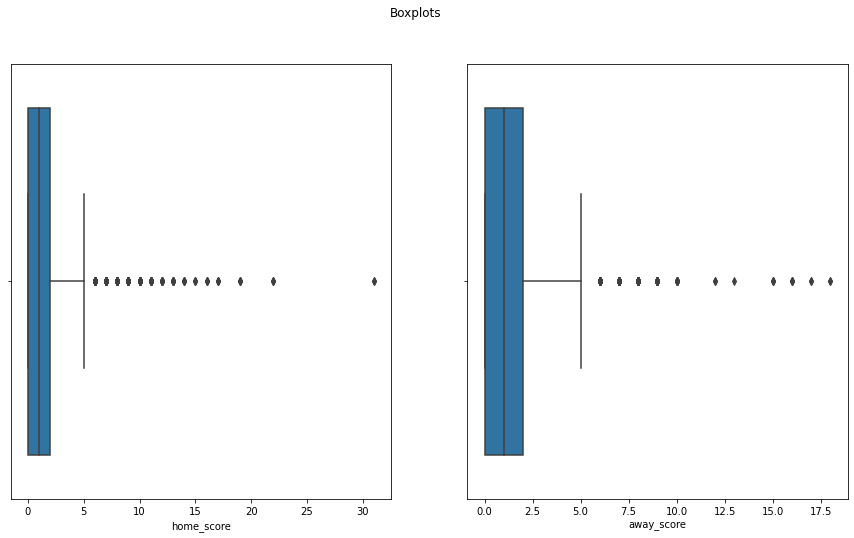

In [1079]:
# Checking for outliers in the home and away scores
fig, axes = plt.subplots(1,2, figsize=(15, 8))
fig.suptitle('Boxplots')
sns.boxplot(df['home_score'], ax=axes[0])
sns.boxplot(df['away_score'], ax=axes[1])
plt.show()

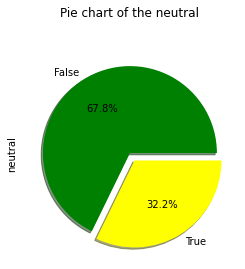

In [1080]:
#Categorical variables
# Pie chart for neutral
df['neutral'].value_counts().plot(kind='pie',shadow = True,explode=(0,0.1), colors=['green','yellow'], autopct='%1.1f%%')
plt.title("Pie chart of the neutral", y=1.1)
plt.show()

In [1081]:
#Frequency table
df['tournament'].value_counts()

Friendly                                10259
FIFA World Cup qualification             5378
UEFA Euro qualification                  1629
African Cup of Nations qualification     1063
CECAFA Cup                                760
                                        ...  
Windward Islands Tournament                 7
SKN Football Festival                       6
Dragon Cup                                  6
Copa del Pacífico                           4
Copa América qualification                  2
Name: tournament, Length: 65, dtype: int64

In [1082]:
#Frequency table
df['country'].value_counts()

United States               1249
South Africa                 637
Qatar                        563
United Arab Emirates         533
France                       521
                            ... 
Zanzibar                       1
Turks and Caicos Islands       1
Sint Maarten                   1
Zaïre                          1
Yugoslavia                     1
Name: country, Length: 222, dtype: int64

In [1083]:
#Frequency table
df['home_team'].value_counts()

Saudi Arabia             445
Mexico                   436
Oman                     374
Qatar                    368
United Arab Emirates     343
                        ... 
Andalusia                  1
Galicia                    1
St. Pierre & Miquelon      1
Silesia                    1
Réunion                    1
Name: home_team, Length: 229, dtype: int64

In [1084]:
#Frequency table
df['away_team'].value_counts()

Saudi Arabia                389
Zambia                      375
Syria                       327
Iraq                        310
Uganda                      307
                           ... 
South Sudan                  19
Turks and Caicos Islands     10
Montserrat                    8
Kosovo                        6
Gibraltar                     6
Name: away_team, Length: 193, dtype: int64

## Bivariate analysis

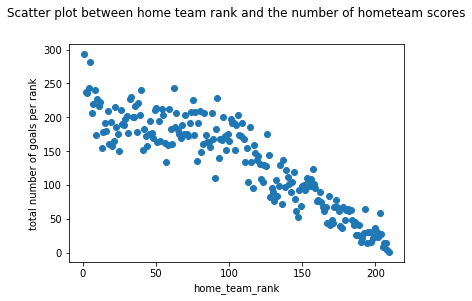

In [1085]:
#creating a scatter plot for total number of goals per rank
grp=df.groupby('home_team_rank')['home_score'].count().reset_index(name='total number of goals per rank')
plt.scatter(grp["home_team_rank"] , grp['total number of goals per rank'])
plt.title("Scatter plot between home team rank and the number of hometeam scores", y=1.1)
plt.xlabel('home_team_rank')
plt.ylabel('total number of goals per rank')
plt.show()
# we can see that as the rank increases the number of home team scores reduces

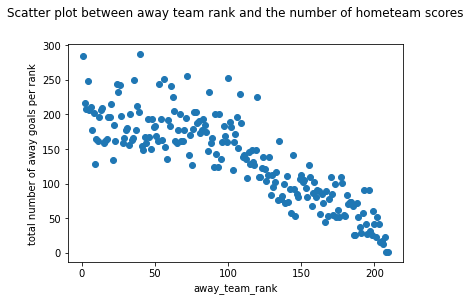

In [1086]:
#creating a scatter plot for total number of goals per rank
grp=df.groupby('away_team_rank')['away_score'].count().reset_index(name='total number of away goals per rank')
plt.scatter(grp["away_team_rank"] , grp['total number of away goals per rank'])
plt.title("Scatter plot between away team rank and the number of hometeam scores", y=1.1)
plt.xlabel('away_team_rank')
plt.ylabel('total number of away goals per rank')
plt.show()
# we can see that as the rank increases the number of away team scores reduces

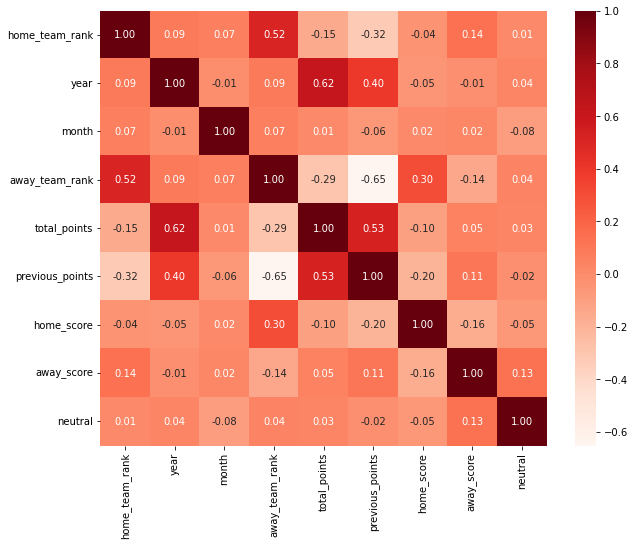

In [1087]:
#Plotting a heat map to show correlation between the different variables
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="Reds",fmt=".2f");
plt.show()

## 7. Feature Engineering

In [1088]:
# creating a colum with status (win,lose,draw)
# Creating a list to display the conditions of the match
# from the home team's perspective 

condition  = [
              
    (df['home_score'] == df['away_score']),         
    (df['home_score'] < df['away_score']),
    (df['home_score'] > df['away_score'])

    ]

# the status we want to assign the conditions
status = ['Draw','Lose','Win']

# Creating a new column and use np.select to assign values to it using our lists 
df['status'] = np.select(condition, status)
df.head(2)

,home_team_rank,confederation_x,year,month,date_x,away_team,city_x,away_team_rank,total_points,previous_points,confederation_y,date_y,home_team,home_score,away_score,tournament,city_y,country,neutral,status
0,4,UEFA,1993,8,1993-08-11,Switzerland,Borås,3,0.0,50,UEFA,1993-08-11,Sweden,1,2,Friendly,Borås,Sweden,False,Lose
1,4,UEFA,1993,8,1993-08-22,France,Solna,12,0.0,45,UEFA,1993-08-22,Sweden,1,1,FIFA World Cup qualification,Solna,Sweden,False,Draw


In [1089]:
#convert non numerical columns to numerical using lable ecncoding 
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
df['neutral']= en.fit_transform(df['neutral'])
df['status']= en.fit_transform(df['status'])

In [1090]:
#multicollinearity
# Pick independent variables only.
independent_only= df[["home_team_rank","year","month","away_team_rank","total_points","previous_points","neutral","status"]]

# Let's display the correlations between the variables
correlations = independent_only.corr()
correlations
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,home_team_rank,year,month,away_team_rank,total_points,previous_points,neutral,status
home_team_rank,1.418764,-0.106524,-0.047107,-0.740441,0.075946,0.004199,0.020655,0.228546
year,-0.106524,2.346345,0.068303,-1.276236,-1.249617,-1.123703,0.002175,0.062754
month,-0.047107,0.068303,1.018849,-0.070904,-0.098800,0.022398,0.091362,0.005758
away_team_rank,-0.740441,-1.276236,-0.070904,2.940309,0.555071,1.834168,-0.081817,-0.370030
total_points,0.075946,-1.249617,-0.098800,0.555071,2.062463,-0.213653,-0.062935,-0.021942
previous_points,0.004199,-1.123703,0.022398,1.834168,-0.213653,2.751391,0.017464,-0.024708
neutral,0.020655,0.002175,0.091362,-0.081817,-0.062935,0.017464,1.016751,0.066545
status,0.228546,0.062754,0.005758,-0.370030,-0.021942,-0.024708,0.066545,1.086818


## Polynomial Regression


### Model 1 - Predicting Home score

In [1091]:
# Picking the columns needed for predicting home scores
#
# We first select the columns that we will use in our modelling
df1= df[["home_team","away_team","home_score","home_team_rank","away_team_rank","total_points",	"previous_points","neutral","status"]]
df1.head()

,home_team,away_team,home_score,home_team_rank,away_team_rank,total_points,previous_points,neutral,status
0,Sweden,Switzerland,1,4,3,0.0,50,0,1
1,Sweden,France,1,4,12,0.0,45,0,0
2,Paraguay,Peru,2,5,70,0.0,16,0,2
3,Argentina,Peru,2,5,70,0.0,16,0,2
4,Colombia,Peru,4,5,70,0.0,16,0,2


In [1094]:
#Slitting our data into train and features
X=df1[["home_team_rank","away_team_rank","total_points","previous_points","neutral","status"]]
y=df1["home_score"]

# Encoding the categorical vriables using the get dummies function
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into train and test sets
X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=25)

In [1095]:
#Standardising the data to the same scale
standard = StandardScaler()
X_train = standard.fit_transform(X_train)
X_test = standard.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored

In [ ]:
# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 5) 
X_poly = poly_reg.fit_transform(X)

#
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

#Visualize the Polynomial Regression results
plt.scatter(X, y, color='blue') 
plt.plot(X, pol_reg.predict(X_poly), color='red')
plt.title('Home score Prediction (Polynomial Regression)')
plt.xlabel('Weight')
plt.ylabel("home_score")
plt.show()

## 8. Challenging the solution

> The easy solution is nice because it is, well, easy, but you should never allow those results to hold the day. You should always be thinking of ways to challenge the results, especially if those results comport with your prior expectation.






In [ ]:
# Reviewing the Solution 
#

## 9. Follow up questions

> At this point, we can refine our question or collect new data, all in an iterative process to get at the truth.



### a). Did we have the right data?

### b). Do we need other data to answer our question?

### c). Did we have the right question?